In [2]:
def sec_mult(A, B): # f() que calcula la mult. en secuencial, como toda la vida se ha hecho
    C = [[0] * n_col_B for i in range(n_fil_A)] # Crear y poblar la matrix  C = A*B
    for i in range(n_fil_A): # Hago la multiplicacion de AxB = C, i para iterar sobre las filas de A
        for j in range(n_col_B): # j para iterar sobre las columnas de B
            for k in range(n_col_A): # k para iterar en C
                C[i][j] += A[i][k] * B[k][j] # Aqui se hace la multiplicación y guardo en C.
    return C

In [3]:
def par_mult(A, B): # f() que prepara el reparto de trabajo para la mult. en paralelo
    n_cores = mp.cpu_count() # Obtengo los cores de mi pc
    size_col = math.ceil(n_col_B/n_cores) # Columnas  a procesar x c/cpre, ver Excel adjunto
    size_fil = math.ceil(n_fil_A/n_cores) # Filas a procesar x c/cpre, ver Excel adjunto
    MC = mp.RawArray('i', n_fil_A * n_col_B) # Array MC de memoria compartida donde se almacenaran los resultados, ver excel adjunto
    cores = [] # Array para guardar los cores y su trabajo
    for core in range(n_cores):# Asigno a cada core el trabajo que le toca, ver excel adjunto
        i_MC = min(core * size_fil, n_fil_A) # Calculo i para marcar inicio del trabajo del core en relacion a las filas
        f_MC = min((core + 1) * size_fil, n_fil_A) # Calculo f para marcar fin del trabajo del core, ver excel
        cores.append(mp.Process(target=par_core, args=(A, B, MC, i_MC, f_MC)))# Añado al Array los cores y su trabajo
    for core in cores:
        core.start()# Arranco y ejecuto el trabajo para c/ uno de los cores que tenga mi equipo, ver excel
    for core in cores:
        core.join()# Bloqueo cualquier llamada hasta que terminen su trabajo todos los cores
    C_2D = [[0] * n_col_B for i in range(n_fil_A)] # Convierto el array unidimensional MC en una matrix 2D (C_2D)
    for i in range(n_fil_A):# i para iterar sobre las filas de A
        for j in range(n_col_B):# j para iterar sobre las columnas de B
            C_2D[i][j] = MC[i*n_col_B + j] # Guardo el C_2D los datos del array MC
    return C_2D

In [ ]:
def par_core(A, B, MC, i_MC, f_MC): # La tarea que hacen todos los cores
    for i in range(i_MC, f_MC): # Size representado en colores en el excel que itera sobre las filas en A
        for j in range(len(B[0])): # Size representado en colores en el excel que itera sobre las columnas en B
            for k in range(len(A[0])): # n_fil_B o lo que es l mismo el n_col_A
                MC[i*len(B[0]) + j] += A[i][k] * B[k][j]# Guarda resultado en MC[] de cada core

In [ ]:
if __name__ == '__main__':
    A = [[random.randint(0,215) for i in range(6)] for j in range(2227)] # Genero A[21535220][6]con num. aleatorios del 0 al 215, ver excel
    B = [[random.randint(0,215) for i in range(2227)] for j in range(6)] # Genero B[6][21535220]con num. aleatorios del 0 al 215, ver excel
    n_fil_A = len(A) # Obtengo num de filas de A
    n_col_A = len(A[0]) # Obtengo num de colunmas de A
    n_fil_B = len(B) # Obtengo num de filas de B
    n_col_B = len(B[0]) # # Obtengo num de filas de B
    if n_col_A != n_fil_B: raise Exception('Dimensiones no validas') # Compruebo que se puedan multiplicar A y B
    inicioS = time.time()
    sec_mult(A, B) # Ejecuto multiplicacion secuencial
    finS = time.time()
    inicioP = time.time()
    par_mult(A, B) # Ejecuto multiplicacion paralela
    finP = time.time()
    print('\n\nMatriz  A y B se han multiplicado con exito en SECUENCIAL ha tardado ', finS-inicioS, ' y en PARALELO ', finP-inicioP)


In [4]:
from IPython import display as dp

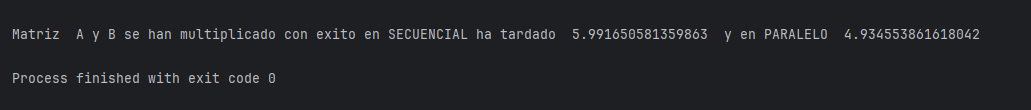

In [6]:
dp.Image("MultiplicacionMatrices.png")

In [7]:
!git status

On branch main
Your branch is up to date with 'origin/main'.

Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
  (commit or discard the untracked or modified content in submodules)
	modified:   PCD2023 (modified content)
	modified:   Untitled.ipynb

Untracked files:
  (use "git add <file>..." to include in what will be committed)
	.ipynb_checkpoints/22277303_26102023-checkpoint.ipynb
	.ipynb_checkpoints/MultiplicacionMatrices-checkpoint.ipynb
	.ipynb_checkpoints/README-checkpoint.md
	22277303_26102023.ipynb
	MultiplicacionMatrices.ipynb
	MultiplicacionMatrices.png

no changes added to commit (use "git add" and/or "git commit -a")


In [8]:
!git add MultiplicacionMatrices.ipynb

In [9]:
!git add MultiplicacionMatrices.png

In [10]:
!git status

On branch main
Your branch is up to date with 'origin/main'.

Changes to be committed:
  (use "git restore --staged <file>..." to unstage)
	new file:   MultiplicacionMatrices.ipynb
	new file:   MultiplicacionMatrices.png

Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
  (commit or discard the untracked or modified content in submodules)
	modified:   PCD2023 (modified content)
	modified:   Untitled.ipynb

Untracked files:
  (use "git add <file>..." to include in what will be committed)
	.ipynb_checkpoints/22277303_26102023-checkpoint.ipynb
	.ipynb_checkpoints/MultiplicacionMatrices-checkpoint.ipynb
	.ipynb_checkpoints/README-checkpoint.md
	22277303_26102023.ipynb



In [11]:
!git add.

git: 'add.' is not a git command. See 'git --help'.

The most similar command is
	add


In [12]:
!git add .

In [13]:
!git commit -m "AÑADIDA CAPTURA DE PANTALLA DE CUANTO HA TARDADO LA MULTIPLICACIÓN DE MATRICES Y NOTEBOOKS VARIADOS"

[main b1b9e03] AÃ‘ADIDA CAPTURA DE PANTALLA DE CUANTO HA TARDADO LA MULTIPLICACIÃ“N DE MATRICES Y NOTEBOOKS VARIADOS
 7 files changed, 957 insertions(+), 165 deletions(-)
 create mode 100644 .ipynb_checkpoints/22277303_26102023-checkpoint.ipynb
 create mode 100644 .ipynb_checkpoints/MultiplicacionMatrices-checkpoint.ipynb
 create mode 100644 .ipynb_checkpoints/README-checkpoint.md
 create mode 100644 22277303_26102023.ipynb
 create mode 100644 MultiplicacionMatrices.ipynb
 create mode 100644 MultiplicacionMatrices.png


In [14]:
!git push 

To https://github.com/SrHuevo04/PCD_2023.git
   09fb9b7..b1b9e03  main -> main
